<a href="https://colab.research.google.com/github/michellewang1204/stock_process/blob/main/week3_basicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install beautifulsoup4 requests

In [2]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2024-10-02 12:23:53--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-10-02 12:23:53--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  55.6MB/s    in 0.4s    

2024-10-02 12:23:56 (55.6 MB/s) 

In [3]:
!pip install mplfinance

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import matplotlib.font_manager as fm
import matplotlib


# **API抓取**

In [5]:
# 將民國年轉換為西元年
def convert_to_ad(date_str):
    # 將民國年轉換為西元年
    parts = date_str.split('/')
    parts[0] = str(int(parts[0]) + 1911)  # 民國轉西元 (例如 112 + 1911 = 2023)
    return '/'.join(parts)

In [6]:
# 定義函數來抓取指定月份的股票數據
def fetch_stock_data(date, stock_no):
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_no}"
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data['data'], columns=data['fields'])

In [7]:
def fetch_multiple_months(stock_id, start_year, start_month, end_year, end_month):
    all_data = []

    # 從起始年月到結束年月逐月抓取
    year,month = start_year, start_month

    while (year < end_year) or (year == end_year and month <= end_month):
        # 格式化日期
        date = f"{year}{str(month).zfill(2)}01"
        print(f"Fetching data for {year}-{str(month).zfill(2)}")
        # 抓取當前月份的數據
        df = fetch_stock_data(date, stock_id)

        # 將數據添加到列表中
        if df is not None:
            all_data.append(df)

        # 移動到下一個月
        month += 1
        if month > 12:
            month = 1
            year += 1

    # 將每月資料合併成一個 DataFrame
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return pd.DataFrame()

df = fetch_multiple_months('6214', 2022, 1, 2024, 9)
print(df)

Fetching data for 2022-01
Fetching data for 2022-02
Fetching data for 2022-03
Fetching data for 2022-04
Fetching data for 2022-05
Fetching data for 2022-06
Fetching data for 2022-07
Fetching data for 2022-08
Fetching data for 2022-09
Fetching data for 2022-10
Fetching data for 2022-11
Fetching data for 2022-12
Fetching data for 2023-01
Fetching data for 2023-02
Fetching data for 2023-03
Fetching data for 2023-04
Fetching data for 2023-05
Fetching data for 2023-06
Fetching data for 2023-07
Fetching data for 2023-08
Fetching data for 2023-09
Fetching data for 2023-10
Fetching data for 2023-11
Fetching data for 2023-12
Fetching data for 2024-01
Fetching data for 2024-02
Fetching data for 2024-03
Fetching data for 2024-04
Fetching data for 2024-05
Fetching data for 2024-06
Fetching data for 2024-07
Fetching data for 2024-08
Fetching data for 2024-09
            日期     成交股數        成交金額     開盤價     最高價     最低價     收盤價   漲跌價差  \
0    111/01/03  134,547  11,396,657   84.50   84.80   84.50   84

In [8]:
# 資料處理，將日期轉換為正確格式
df['日期'] = df['日期'].apply(convert_to_ad)
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))

# 重新命名欄位
df.rename(columns={
    '日期': 'Date',
    '開盤價': 'Open',
    '最高價': 'High',
    '最低價': 'Low',
    '收盤價': 'Close',
    '成交股數': 'Volume'
}, inplace=True)

print(df)

          Date  Volume      成交金額   Open   High    Low  Close 漲跌價差 成交筆數
0   2022-01-03  134547  11396657   84.5   84.8   84.5   84.6 -0.2  137
1   2022-01-04  165960  14023219   84.6   84.9   84.3   84.5 -0.1  191
2   2022-01-05  102807   8664903   84.5   84.5   84.1   84.5  0.0  139
3   2022-01-06  126382  10646269   84.2   84.3   84.1   84.1 -0.4  124
4   2022-01-07  178977  15062036   84.2   84.5   84.0   84.1  0.0  583
..         ...     ...       ...    ...    ...    ...    ...  ...  ...
660 2024-09-24  439562  56211736  130.0  130.0  127.0  127.0 -3.0  515
661 2024-09-25  363389  46479740  128.0  129.0  127.0  127.0  0.0  531
662 2024-09-26  296012  37987580  128.5  129.5  127.5  127.5  0.5  373
663 2024-09-27  387013  49504853  128.0  128.5  127.0  127.5  0.0  366
664 2024-09-30  449067  57157815  127.5  128.5  126.5  127.0 -0.5  374

[665 rows x 9 columns]


<Figure size 1000x600 with 0 Axes>

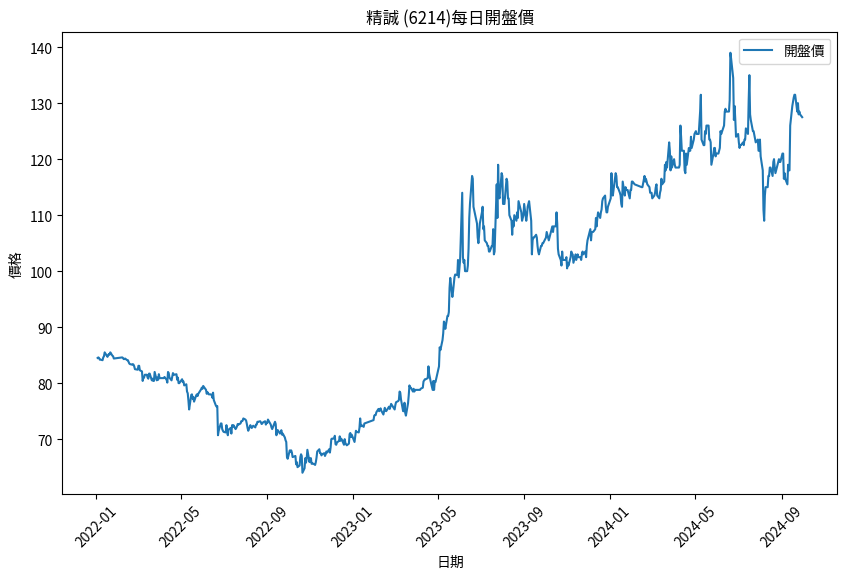

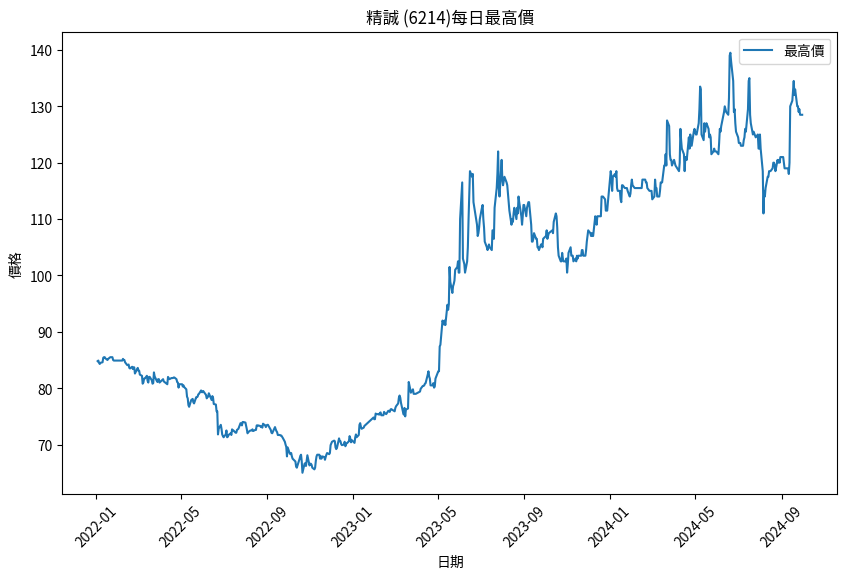

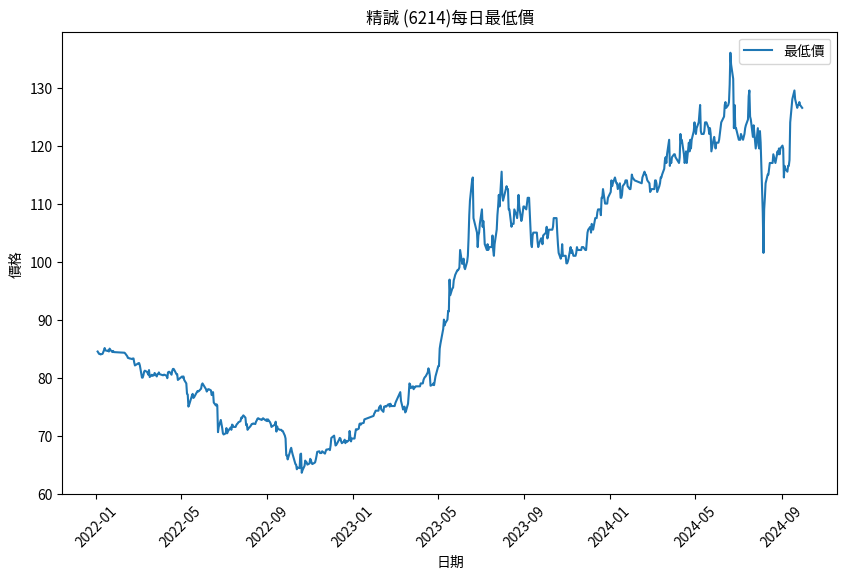

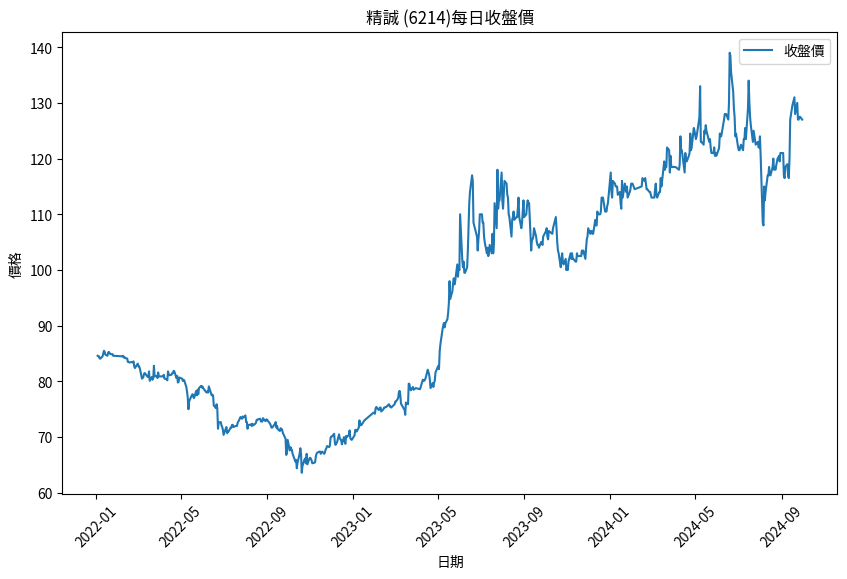

In [9]:
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

# 定義一個繪製函數
def plot_stock_data(df, column_name, label_name, stock_name):
  plt.figure(figsize=(10, 6))
  plt.plot(df['Date'], df[column_name], label=label_name)
  # 設定圖表標題和軸標籤
  plt.title(f'{stock_name}每日{label_name}')
  plt.xlabel('日期')
  plt.ylabel('價格')
  plt.xticks(rotation=45)
  plt.legend()
  plt.show()

# 繪製收盤價圖表
plt.figure(figsize=(10, 6))
# 使用定義的函數繪製各個欄位
plot_stock_data(df, 'Open', '開盤價', '精誠 (6214)')
plot_stock_data(df, 'High', '最高價', '精誠 (6214)')
plot_stock_data(df, 'Low', '最低價', '精誠 (6214)')
plot_stock_data(df, 'Close', '收盤價', '精誠 (6214)')

# **Yahoo 奇摩抓取股票資料**

In [10]:
import yfinance as yf

# 從 Yahoo Finance 抓取股票數據 (以 AAPL 為例)
df_yahoo = yf.download('AAPL', start='2022-01-01', end='2024-09-30')

df_yahoo.reset_index(inplace=True)

# 顯示數據
print(df_yahoo)


[*********************100%***********************]  1 of 1 completed

          Date        Open        High         Low       Close   Adj Close  \
0   2022-01-03  177.830002  182.880005  177.710007  182.009995  179.273590   
1   2022-01-04  182.630005  182.940002  179.119995  179.699997  176.998322   
2   2022-01-05  179.610001  180.169998  174.639999  174.919998  172.290176   
3   2022-01-06  172.699997  175.300003  171.639999  172.000000  169.414124   
4   2022-01-07  172.889999  174.139999  171.029999  172.169998  169.581543   
..         ...         ...         ...         ...         ...         ...   
683 2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
684 2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
685 2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
686 2024-09-26  227.300003  228.500000  225.410004  227.520004  227.520004   
687 2024-09-27  228.460007  229.520004  227.300003  227.789993  227.789993   

        Volume  
0    104487900  
1     99310400  
2     945376

<Figure size 1000x600 with 0 Axes>

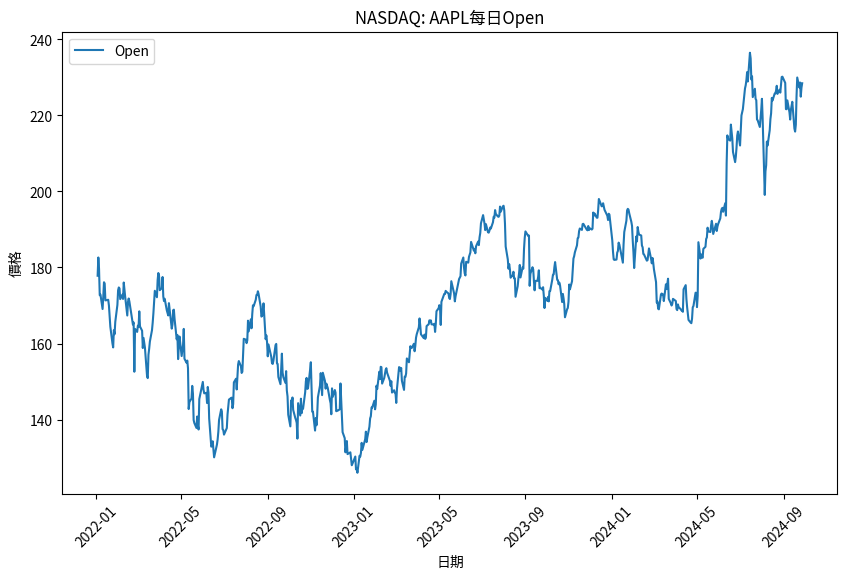

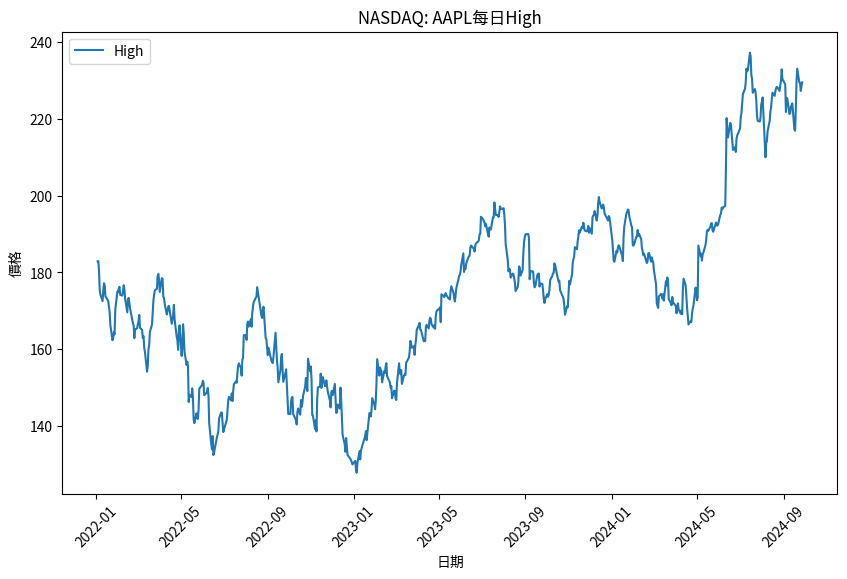

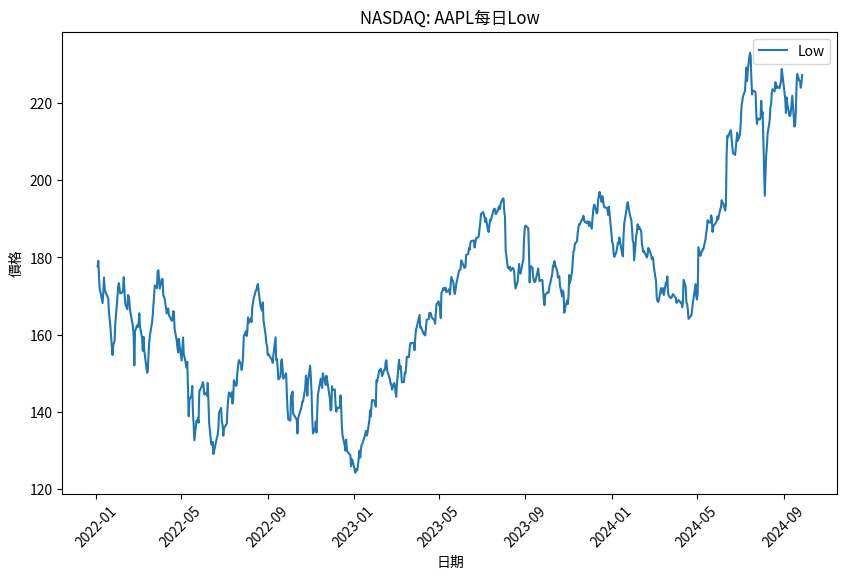

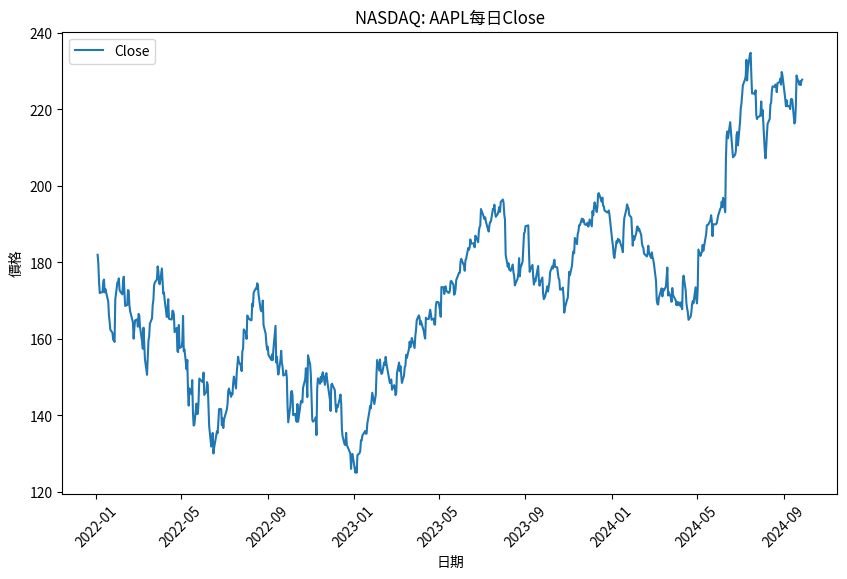

In [11]:
# 繪製收盤價圖表
plt.figure(figsize=(10, 6))
# 使用定義的函數繪製各個欄位
plot_stock_data(df_yahoo, 'Open', 'Open', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'High', 'High', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'Low', 'Low', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'Close', 'Close', 'NASDAQ: AAPL')

# **計算技術指標(SMA、RSI、MACD)**

In [12]:
import numpy as np

In [13]:
# 定義技術指標計算函數
def calculate_technical_indicators(df):

    # 計算簡單移動平均線(SMA)
    df['SMA_20'] = df['Close'].rolling(window=20).mean()

    # 計算相對強弱指標(RSI)
    def calculate_RSI(data, window=14):
        delta = data.diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        RS = gain / loss
        return 100 - (100 / (1 + RS))

    df['RSI_14'] = calculate_RSI(df['Close'], window=14)

    # 計算MACD
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    return df

# 假設 df 是你的股票資料 DataFrame
df = calculate_technical_indicators(df)

# 顯示包含技術指標的數據
print(df[['SMA_20', 'RSI_14', 'MACD', 'Signal_Line']])

      SMA_20     RSI_14      MACD  Signal_Line
0        NaN        NaN  0.000000     0.000000
1        NaN        NaN -0.007977    -0.001595
2        NaN        NaN -0.014136    -0.004104
3        NaN        NaN -0.050709    -0.013425
4        NaN        NaN -0.078786    -0.026497
..       ...        ...       ...          ...
660  122.525  59.375000  2.555539     1.578535
661  122.875  67.857143  2.471274     1.757083
662  123.225  69.642857  2.416978     1.889062
663  123.625  67.307692  2.346894     1.980628
664  123.925  65.384615  2.225354     2.029573

[665 rows x 4 columns]


In [14]:
# 假設 df 是你的股票資料 DataFrame
df_yahoo = calculate_technical_indicators(df_yahoo)

# 顯示包含技術指標的數據
print(df_yahoo[['SMA_20', 'RSI_14', 'MACD', 'Signal_Line']])

         SMA_20     RSI_14      MACD  Signal_Line
0           NaN        NaN  0.000000     0.000000
1           NaN        NaN -0.184273    -0.036855
2           NaN        NaN -0.707857    -0.171055
3           NaN        NaN -1.342941    -0.405432
4           NaN        NaN -1.811647    -0.686675
..          ...        ...       ...          ...
683  223.680001  56.174900  0.730428     0.305406
684  223.689501  61.264678  0.973629     0.439051
685  223.606501  57.022165  1.073304     0.565901
686  223.658001  61.964287  1.230904     0.698902
687  223.558001  62.207231  1.361890     0.831499

[688 rows x 4 columns]


# **繪製K線圖和技術指標**

In [15]:
import mplfinance as mpf

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


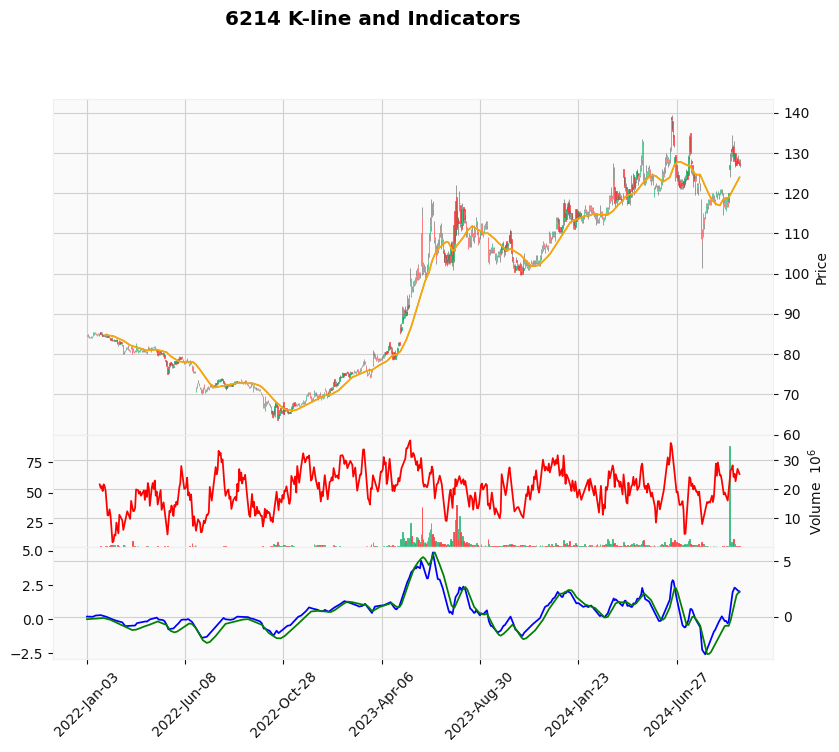

In [16]:
def plot_stock_with_indicators_combined(df):
    # 將欄位轉換為數字型態
    df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
    df['High'] = pd.to_numeric(df['High'], errors='coerce')
    df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

    # 確保 'Date' 已經是索引，且是日期格式
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.set_index('Date', inplace=True)

    # 構建技術指標 (SMA, RSI, MACD) 的繪圖對象
    apds = [
        mpf.make_addplot(df['SMA_20'], color='orange', panel=0),  # SMA20 放在主圖上
        mpf.make_addplot(df['RSI_14'], color='red', panel=1),     # RSI 放在第二個子圖 (panel=1)
        mpf.make_addplot(df['MACD'], color='blue', panel=2),      # MACD 放在第三個子圖 (panel=2)
        mpf.make_addplot(df['Signal_Line'], color='green', panel=2)  # Signal Line 放在第三個子圖
    ]

    # 使用 mplfinance 繪製 K 線圖以及技術指標
    mpf.plot(
        df,
        type='candle',
        style='yahoo',
        volume=True,
        addplot=apds,        # 加入技術指標
        title='6214 K-line and Indicators',
        panel_ratios=(3,1,1),  # 主圖和副圖的高度比例
        mav=(20),             # 繪製 20 天移動平均線
        figscale=1.2,         # 縮放比例
        figsize=(10,8)        # 圖形大小
    )
    df.reset_index(inplace=True)

# 假設 df 是你的股票數據 DataFrame，並且已經包含了技術指標（如 SMA、RSI、MACD）
plot_stock_with_indicators_combined(df)

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


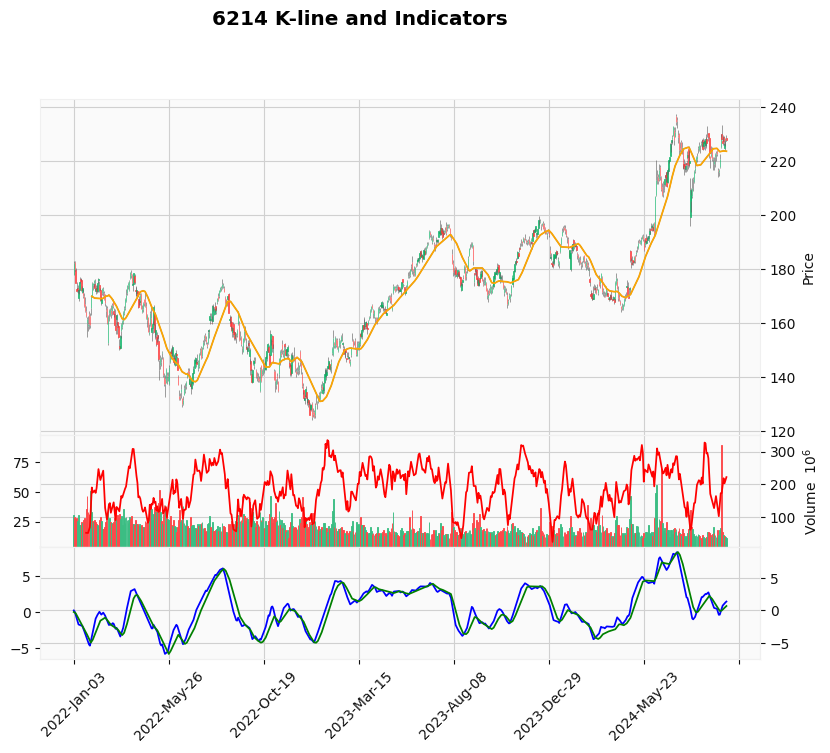

In [17]:
plot_stock_with_indicators_combined(df_yahoo)

# **Machine Learning(線性回歸、決策樹、隨機森林)**

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Open           1.000000
High           0.998454
Low            0.998121
Close          0.996770
SMA_20         0.987184
Signal_Line    0.333186
MACD           0.322891
Volume         0.251280
RSI_14         0.121376
Name: Open, dtype: float64


Close          1.000000
Low            0.998652
High           0.998274
Open           0.996770
SMA_20         0.986786
Signal_Line    0.328611
MACD           0.320467
Volume         0.248719
RSI_14         0.132699
Name: Close, dtype: float64


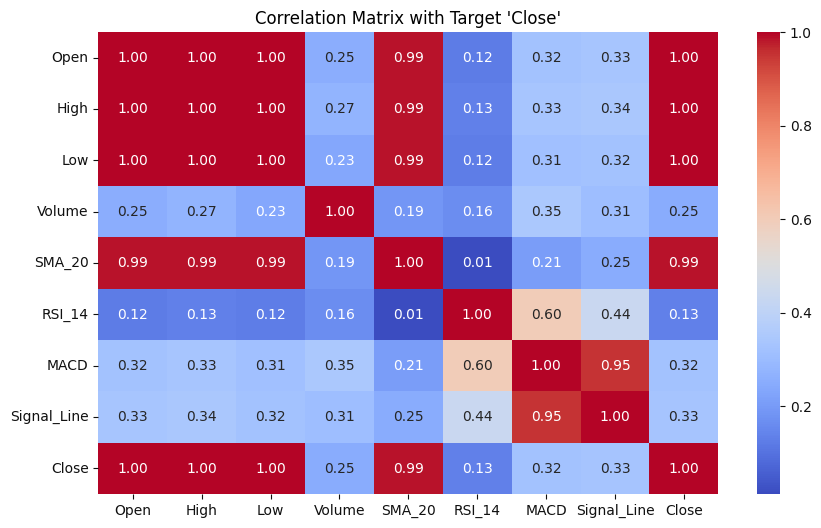

In [19]:
# 計算相關性矩陣
corr_matrix = df[['Open','High', 'Low', 'Volume','SMA_20', 'RSI_14', 'MACD', 'Signal_Line', 'Close']].corr()

# 顯示與目標之間的相關性
print(corr_matrix['Open'].sort_values(ascending=False))
print("\n")
print(corr_matrix['Close'].sort_values(ascending=False))

# 繪製相關性圖
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0)
plt.title("Correlation Matrix with Target 'Close'")
plt.grid(False)
plt.show()


Open           1.000000
Low            0.997995
High           0.997621
Close          0.994911
SMA_20         0.961800
Signal_Line    0.556272
MACD           0.524151
RSI_14         0.248103
Volume        -0.332263
Name: Open, dtype: float64


Close          1.000000
High           0.997849
Low            0.997801
Open           0.994911
SMA_20         0.958614
Signal_Line    0.553367
MACD           0.526248
RSI_14         0.266405
Volume        -0.330068
Name: Close, dtype: float64


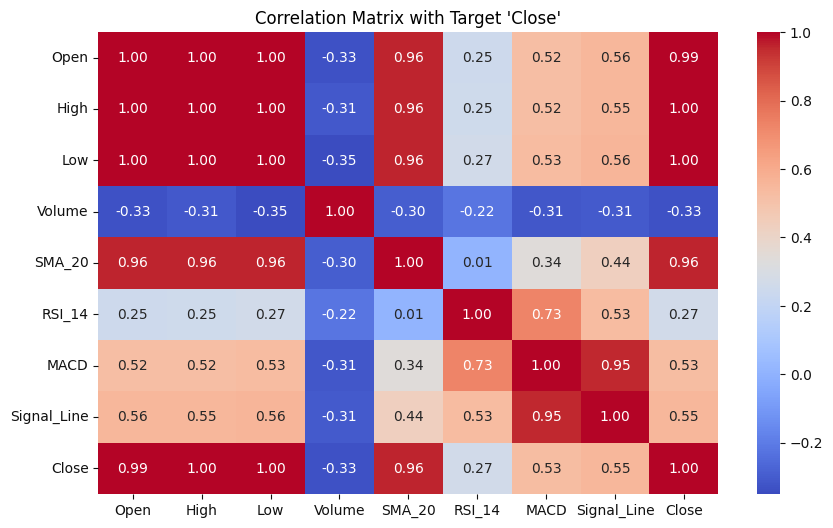

In [20]:
# 計算相關性矩陣
corr_matrix = df_yahoo[['Open','High', 'Low', 'Volume','SMA_20', 'RSI_14', 'MACD', 'Signal_Line', 'Close']].corr()

# 顯示與目標之間的相關性
print(corr_matrix['Open'].sort_values(ascending=False))
print("\n")
print(corr_matrix['Close'].sort_values(ascending=False))

# 繪製相關性圖
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0)
plt.title("Correlation Matrix with Target 'Close'")
plt.grid(False)
plt.show()


In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    """計算 MAPE（平均絕對百分比誤差）"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
# 通用的模型訓練和最佳化函數
def train_model(X_train_scaled, y_train, model, param_grid, random_state):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    return grid_search.best_estimator_

In [23]:
def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    # 訓練集評估
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # 測試集評估
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Training MSE: {train_mse}, Test MSE: {test_mse}")
    print(f"Training MAE: {train_mae}, Test MAE: {test_mae}")
    print(f"Training MAPE: {train_mape}%, Test MAPE: {test_mape}%")
    print(f"Training R²: {train_r2}, Test R²: {test_r2}")

    return train_mse, test_mse, train_mae, test_mae, train_mape, test_mape, train_r2, test_r2

In [24]:
# 評估模型表現
def evaluate_and_store_results(model_name, model, X_train_scaled, y_train, X_test_scaled, y_test, results, key_prefix):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 評估模型表現
    train_mse, test_mse, train_mae, test_mae, train_mape, test_mape, train_r2, test_r2 = evaluate_model_performance(
        model, X_train_scaled, y_train, X_test_scaled, y_test)

    # 將結果存入字典
    results[model_name] = {
        f'Train_MSE_{key_prefix}': train_mse,
        f'Test_MSE_{key_prefix}': test_mse,
        f'Train_MAE_{key_prefix}': train_mae,
        f'Test_MAE_{key_prefix}': test_mae,
        f'Train_MAPE_{key_prefix}': train_mape,
        f'Test_MAPE_{key_prefix}': test_mape,
        f'Train_R2_{key_prefix}': train_r2,
        f'Test_R2_{key_prefix}': test_r2,
        f'y_pred_{key_prefix}': y_pred
    }

In [25]:
n=30

def train_and_predict_stock(df, test_size=0.2, random_state=42):
    # 移除缺失值
    df = df.dropna()

    # 添加額外的時間特徵
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Weekday'] = df['Date'].dt.weekday

    # 找到最後 n 個時間點的數據
    last_n_data = df.iloc[-n:]

    # 將最後 30 個數據之前的數據作為訓練集
    train_data = df.iloc[:-n]

    # 去除 'Open' 和 'Close' 欄位的特徵
    features = ['High', 'Low', 'MACD', 'RSI_14', 'SMA_20', 'Signal_Line', 'Volume', 'Month', 'Weekday', 'Year']

    X_train = train_data[features]
    y_train_open = train_data['Open']
    y_train_close = train_data['Close']

    X_test = last_n_data[features]
    y_test_open = last_n_data['Open']
    y_test_close = last_n_data['Close']

    # 標準化處理特徵
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 調整隨機森林參數
    param_grid = {
        'max_depth': [3, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    }
     # 通用模型訓練
    rf_model = RandomForestRegressor(random_state=random_state)
    dt_model = DecisionTreeRegressor(random_state=random_state)

    # 開盤價模型訓練
    best_rf_model_open = train_model(X_train_scaled, y_train_open, rf_model, param_grid, random_state)
    best_dt_model_open = train_model(X_train_scaled, y_train_open, dt_model, param_grid, random_state)

    # 收盤價模型訓練
    best_rf_model_close = train_model(X_train_scaled, y_train_close, rf_model, param_grid, random_state)
    best_dt_model_close = train_model(X_train_scaled, y_train_close, dt_model, param_grid, random_state)

    # 模型列表：線性回歸、隨機森林、決策樹（分開處理開盤價和收盤價）
    models_open = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': best_dt_model_open,
        'Random Forest': best_rf_model_open
    }

    models_close = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': best_dt_model_close,
        'Random Forest': best_rf_model_close
    }

    # 存放結果的字典
    results = {}

    # 訓練和預測每個模型
    print("---- 開盤價預測 ----")
    for model_name, model in models_open.items():
      evaluate_and_store_results(model_name, model, X_train_scaled, y_train_open, X_test_scaled, y_test_open, results, 'open')

    # 構建 DataFrame，顯示實際值與預測值
    df_predictions_open = pd.DataFrame({
        'Date': last_n_data['Date'],
        'Day_Count': range(1, n + 1),
        'True_Open': y_test_open
    })

    # 添加每個模型的預測結果
    for model_name, result in results.items():
        if 'y_pred_open' in result:
          df_predictions_open[f'{model_name}_Pred_Open'] = result['y_pred_open']

    # 打印出 DataFrame 結果
    print(df_predictions_open)

    # 繪製預測結果
    plt.figure(figsize=(10,6))
    plt.plot(last_n_data['Date'], y_test_open, label='True Open Price', color='red')

    for model_name, result in results.items():
      if 'y_pred_open' in result:
        plt.plot(last_n_data['Date'], result['y_pred_open'], label=f'{model_name} Predicted')
      else:
        print(result)

    plt.title(f'Stock Open Price Prediction - Last {n} Days')
    plt.legend()
    plt.show()

    # 訓練和預測每個模型
    print("---- 收盤價預測 ----")
    for model_name, model in models_close.items():
      evaluate_and_store_results(model_name, model, X_train_scaled, y_train_close, X_test_scaled, y_test_close, results, 'close')

    # 構建 DataFrame，顯示實際值與預測值
    df_predictions_close = pd.DataFrame({
        'Date': last_n_data['Date'],
        'Day_Count': range(1, n + 1),
        'True_Close': y_test_close
    })

    # 添加每個模型的預測結果
    for model_name, result in results.items():
        if 'y_pred_close' in result:
            df_predictions_close[f'{model_name}_Pred_Close'] = result['y_pred_close']

    # 打印出 DataFrame 結果
    print(df_predictions_close)

    # 繪製預測結果
    plt.figure(figsize=(10,6))
    plt.plot(last_n_data['Date'], y_test_close, label='True Close Price', color='red')

    for model_name, result in results.items():
      if 'y_pred_close' in result:
        plt.plot(last_n_data['Date'], result['y_pred_close'], label=f'{model_name} Predicted')

    plt.title(f'Stock Close Price Prediction - Last {n} Days')
    plt.legend()
    plt.show()

    return results

<ipython-input-25-ff4f35f13e14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
<ipython-input-25-ff4f35f13e14>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-25-ff4f35f13e14>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

---- 開盤價預測 ----
Training MSE: 0.8646173981402329, Test MSE: 0.8456051838560176
Training MAE: 0.607837644686274, Test MAE: 0.693464665988013
Training MAPE: 0.6154331639812176%, Test MAPE: 0.5749878473025378%
Training R²: 0.9979200186729548, Test R²: 0.9699559959942199
Training MSE: 0.19176013749708687, Test MSE: 2.3828703703703713
Training MAE: 0.2658113881768043, Test MAE: 1.1194444444444447
Training MAPE: 0.26712896238046013%, Test MAPE: 0.9042140393059342%
Training R²: 0.9995386890130553, Test R²: 0.9153375968839235
Training MSE: 0.28490242341733407, Test MSE: 0.8184669835265012
Training MAE: 0.3384730823734895, Test MAE: 0.7707674603174615
Training MAPE: 0.338828668265175%, Test MAPE: 0.6302298209982107%
Training R²: 0.9993146197127045, Test R²: 0.9709202050778157
          Date  Day_Count  True_Open  Linear Regression_Pred_Open  \
635 2024-08-19          1      117.0                   118.243680   
636 2024-08-20          2      119.5                   119.338315   
637 2024-08-21 

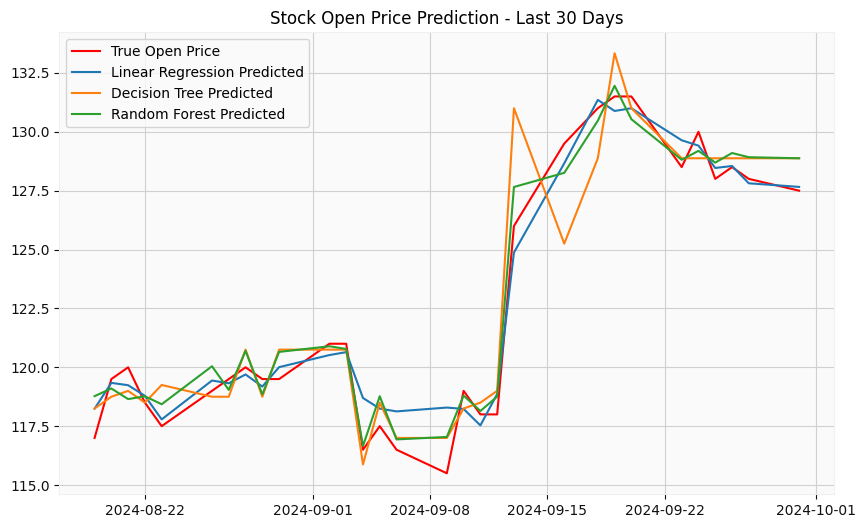

---- 收盤價預測 ----
Training MSE: 0.7170998187414231, Test MSE: 0.7766668807682429
Training MAE: 0.5396992773892758, Test MAE: 0.7148921345945183
Training MAPE: 0.5455397329504085%, Test MAPE: 0.5818383999204053%
Training R²: 0.9982607667191467, Test R²: 0.9657625571448518
Training MSE: 0.0, Test MSE: 2.3833333333333333
Training MAE: 0.0, Test MAE: 1.1666666666666667
Training MAPE: 0.0%, Test MAPE: 0.9484771485048086%
Training R²: 1.0, Test R²: 0.8949366313598237
Training MSE: 0.25746848326962396, Test MSE: 1.3032905509809423
Training MAE: 0.2927482829802285, Test MAE: 0.9148555779346036
Training MAPE: 0.29277063184844854%, Test MAPE: 0.7413001494420747%
Training R²: 0.9993755433439389, Test R²: 0.9425476521945584
          Date  Day_Count  True_Close  Linear Regression_Pred_Close  \
635 2024-08-19          1       118.5                    118.022876   
636 2024-08-20          2       120.0                    119.265729   
637 2024-08-21          3       118.0                    118.899787

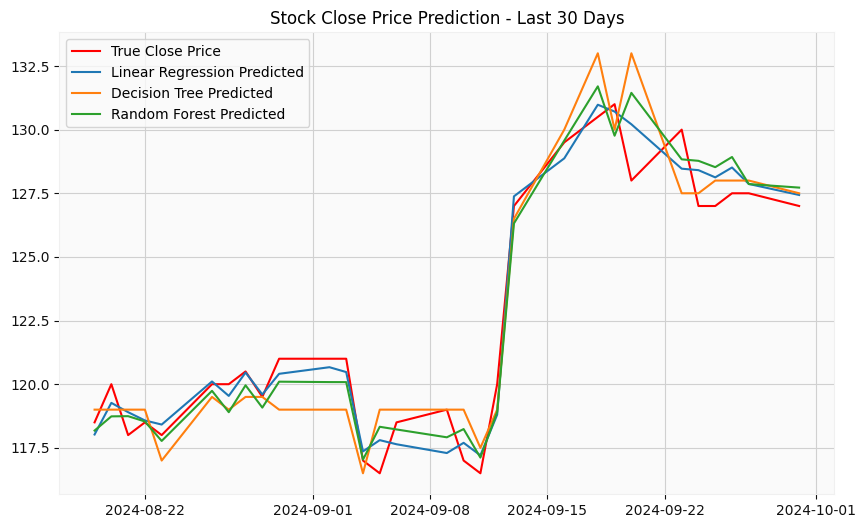

In [26]:
results = train_and_predict_stock(df)

<ipython-input-25-ff4f35f13e14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
<ipython-input-25-ff4f35f13e14>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-25-ff4f35f13e14>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

---- 開盤價預測 ----
Training MSE: 1.6021295609938977, Test MSE: 1.9555754682222515
Training MAE: 0.9693864595864828, Test MAE: 1.0869042231273387
Training MAPE: 0.5799955906374941%, Test MAPE: 0.4836215803994021%
Training R²: 0.9967107590975287, Test R²: 0.872593778382386
Training MSE: 0.1597591293051281, Test MSE: 4.307575434157671
Training MAE: 0.2777828998595521, Test MAE: 1.6872776455349396
Training MAPE: 0.16805142409931847%, Test MAPE: 0.7528059909861753%
Training R²: 0.9996720076356823, Test R²: 0.7193604034633404
Training MSE: 0.31650653112699584, Test MSE: 2.505886769090943
Training MAE: 0.42581388241968093, Test MAE: 1.3426569976806624
Training MAPE: 0.25514926476844113%, Test MAPE: 0.5964276120038091%
Training R²: 0.9993501984774338, Test R²: 0.8367408620943271
          Date  Day_Count   True_Open  Linear Regression_Pred_Open  \
658 2024-08-16          1  223.919998                   224.957809   
659 2024-08-19          2  225.720001                   224.341446   
660 2024-08

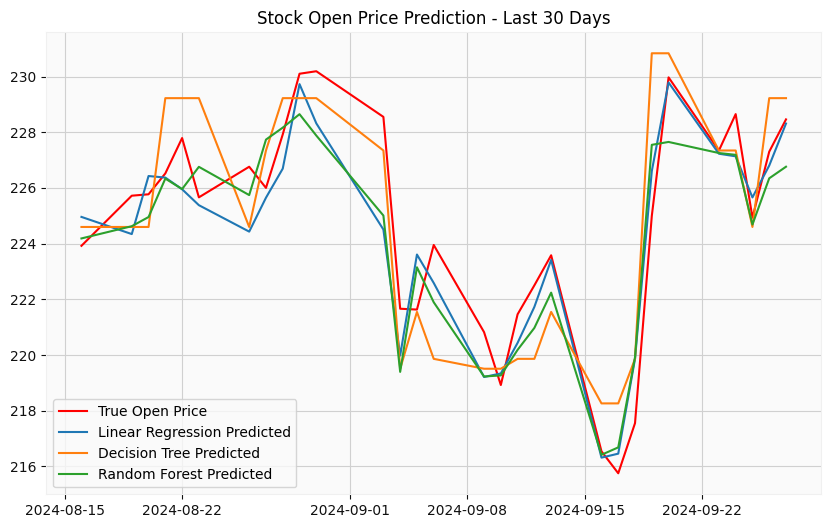

---- 收盤價預測 ----
Training MSE: 1.5671237105564813, Test MSE: 1.48354150395814
Training MAE: 0.9710710169494073, Test MAE: 1.0180389636177352
Training MAPE: 0.5866304158483118%, Test MAPE: 0.45329741385810013%
Training R²: 0.996777757174421, Test R²: 0.8812877346639133
Training MSE: 7.903842650447187e-06, Test MSE: 7.058773870479005
Training MAE: 0.00017214493012764084, Test MAE: 2.4009994506835937
Training MAPE: 9.645566063898661e-05%, Test MAPE: 1.0674636352745674%
Training R²: 0.9999999837485068, Test R²: 0.435160368332113
Training MSE: 0.30608331736469113, Test MSE: 3.030939504600157
Training MAE: 0.4253197597486667, Test MAE: 1.4954519907633455
Training MAPE: 0.2577560590617911%, Test MAPE: 0.664201312601827%
Training R²: 0.9993706465119735, Test R²: 0.7574657037044558
          Date  Day_Count  True_Close  Linear Regression_Pred_Close  \
658 2024-08-16          1  226.050003                    225.405869   
659 2024-08-19          2  225.889999                    224.811862   
660 

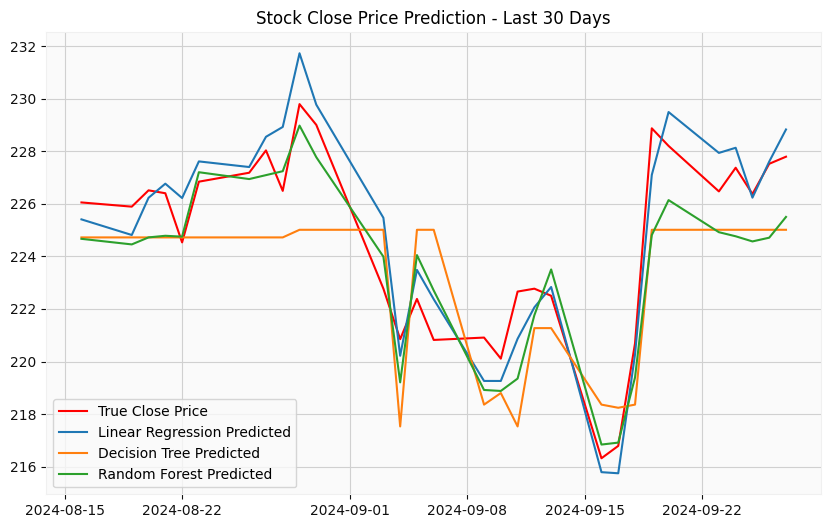

In [27]:
results_yahoo = train_and_predict_stock(df_yahoo)